In [172]:
import pandas as pd
import numpy as np

In [174]:
df = pd.read_csv('sms_spam.csv')

In [176]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3812,ham,Pls i wont belive god.not only jesus.,NaN,NaN,NaN
4012,ham,Ok.,NaN,NaN,NaN
12578,ham,Fire everything treat religious.,NaN,NaN,NaN
8406,spam,Get your free credit score now! No charges: ht...,NaN,NaN,NaN
8352,spam,You have been selected for a cash prize of ₹45...,NaN,NaN,NaN


In [178]:
df.shape

(12582, 5)

## 1.DATA CLEANING

In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12582 entries, 0 to 12581
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   v1          12582 non-null  object 
 1   v2          12582 non-null  object 
 2   Unnamed: 2  0 non-null      float64
 3   Unnamed: 3  0 non-null      float64
 4   Unnamed: 4  0 non-null      float64
dtypes: float64(3), object(2)
memory usage: 491.6+ KB


In [182]:
#drop Last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [184]:
df.sample(5)

,v1,v2
11954,ham,Best its amount recognize beat little which be...
5482,spam,URGENT We are trying to contact you Last weeke...
9370,spam,Win a brand new iPhone! Just answer 3 simple q...
8940,spam,Your loan of ₹35822 is approved. Call now: +91...
6576,spam,This is final notice! Pay your due bill of ₹83...


In [186]:
#rename the cols
df.rename(columns={'v1' : 'target','v2' : 'text'},inplace = True)
df.sample(5)

,target,text
4834,ham,"OH RITE. WELL IM WITH MY BEST MATE PETE, WHO I..."
660,ham,"Under the sea, there lays a rock. In the rock,..."
9791,spam,Your loan of ₹19311 is approved. Call now: +91...
12091,ham,President son can action.
10023,spam,Win a brand new iPhone! Just answer 3 simple q...


In [188]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [190]:
df['target'] = encoder.fit_transform(df['target'])

In [192]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [194]:
#missing value
df.isnull().sum()

target    0
text      0
dtype: int64

In [196]:
df.duplicated().sum()

503

In [198]:
df = df.drop_duplicates(keep='first')

In [200]:
df.duplicated().sum()

0

In [202]:
df.shape

(12079, 2)

## 2.EDA(Exploratory Data Analysis)

In [204]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [206]:
df['target'].value_counts()

target
1    6553
0    5526
Name: count, dtype: int64

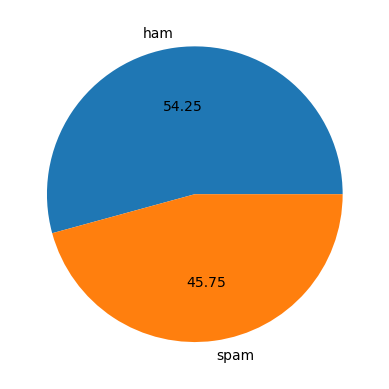

In [208]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [210]:
import nltk

In [212]:
!pip install nltk


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [214]:
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to C:\Users\ayush/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\ayush/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [216]:
df['num_characters'] = df['text'].apply(len)

In [218]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [220]:
# num of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [221]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [222]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [226]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [228]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,12079.000000,12079.000000,12079.000000
mean,75.840715,15.961089,2.061926
std,40.176238,9.265820,1.080609
min,2.000000,1.000000,1.000000
25%,56.000000,11.000000,1.000000
50%,69.000000,14.000000,2.000000
75%,87.000000,17.000000,3.000000
max,910.000000,220.000000,38.000000


In [230]:
# ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5526.000000,5526.000000,5526.000000
mean,69.472494,16.006877,1.670829
std,52.124927,12.527788,1.290287
min,2.000000,1.000000,1.000000
25%,36.000000,8.000000,1.000000
50%,55.000000,12.000000,1.000000
75%,87.000000,19.000000,2.000000
max,910.000000,220.000000,38.000000


In [232]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,6553.000000,6553.000000,6553.000000
mean,81.210896,15.922478,2.391729
std,24.926358,5.091001,0.714774
min,13.000000,2.000000,1.000000
25%,64.000000,13.000000,2.000000
50%,79.000000,15.000000,2.000000
75%,87.000000,17.000000,3.000000
max,224.000000,46.000000,9.000000


In [234]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

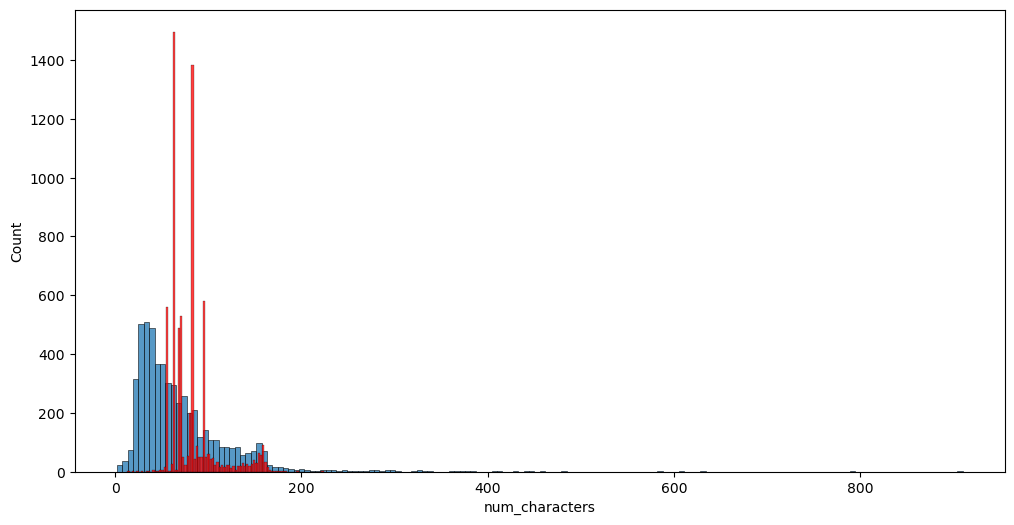

In [236]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

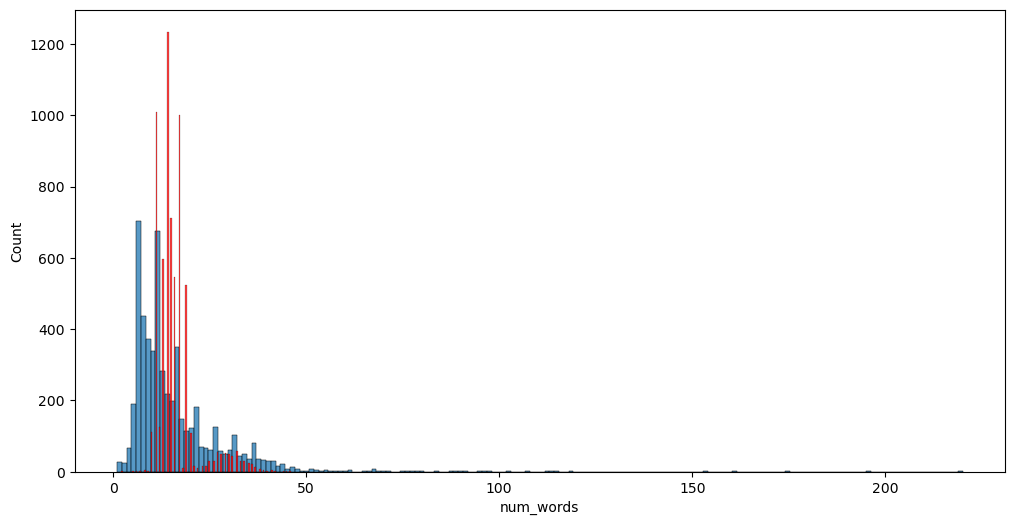

In [238]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

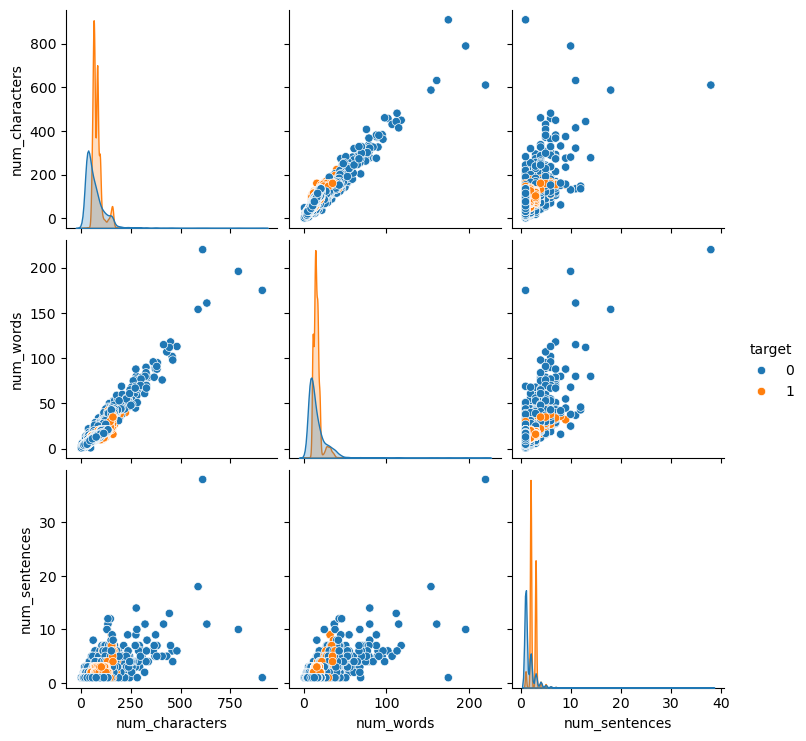

In [240]:
sns.pairplot(df,hue='target')

In [242]:
df_corr = df.drop(columns=['text']).corr()
print(df_corr)

                  target  num_characters  num_words  num_sentences
target          1.000000        0.145563  -0.004538       0.332368
num_characters  0.145563        1.000000   0.937331       0.569381
num_words      -0.004538        0.937331   1.000000       0.613163
num_sentences   0.332368        0.569381   0.613163       1.000000


## 3.DATA PREPROCESSING

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12079 entries, 0 to 12581
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   target          12079 non-null  int32 
 1   text            12079 non-null  object
 2   num_characters  12079 non-null  int64 
 3   num_words       12079 non-null  int64 
 4   num_sentences   12079 non-null  int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 519.0+ KB


In [246]:
from nltk.corpus import stopwords
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [248]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [250]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [252]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english'):
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [254]:
transform_text('No..but heard abt tat..')

'heard abt tat'

In [256]:
df['text'][1000]

'No..but heard abt tat..'

In [258]:
df['transformed_text'] = df['text'].apply(transform_text)

In [259]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [262]:
!pip install wordcloud


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [264]:
# 1️⃣ Create a new column with the number of words in each transformed_text
df['word_count'] = df['transformed_text'] \
                   .fillna("") \
                   .str.split() \
                   .apply(len)

# 2️⃣ See how many rows ended up with 0 words
zero_word_rows = df[df['word_count'] == 0]
print("Rows with no words:", len(zero_word_rows))
print(zero_word_rows[['transformed_text', 'word_count']].head())


Rows with no words: 9
     transformed_text  word_count
252                             0
959                             0
2805                            0
3092                            0
3374                            0


In [266]:
#word cloud for spam
from wordcloud import WordCloud
wc = WordCloud(width=1000,height=1000,min_font_size=10,background_color='white')

In [268]:
# Remove rows with no words
df_filtered = df[df['word_count'] > 0]

# Generate word cloud from the remaining data
text = df_filtered['transformed_text'].str.cat(sep=" ")
spam_wc = wc.generate(text)


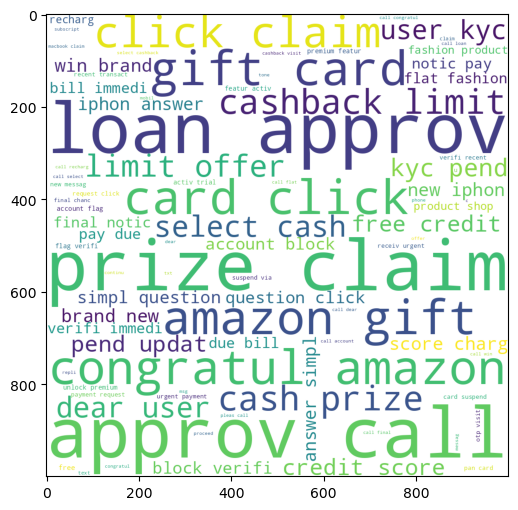

In [270]:
spam_wc = wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

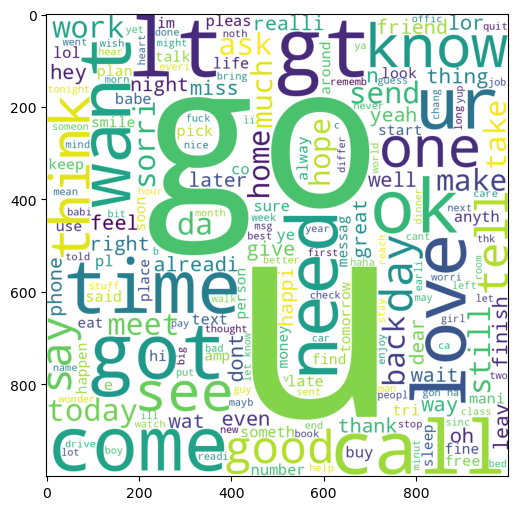

In [272]:
ham_wc = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep = " "))
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

In [274]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [276]:
len(spam_corpus)

45934

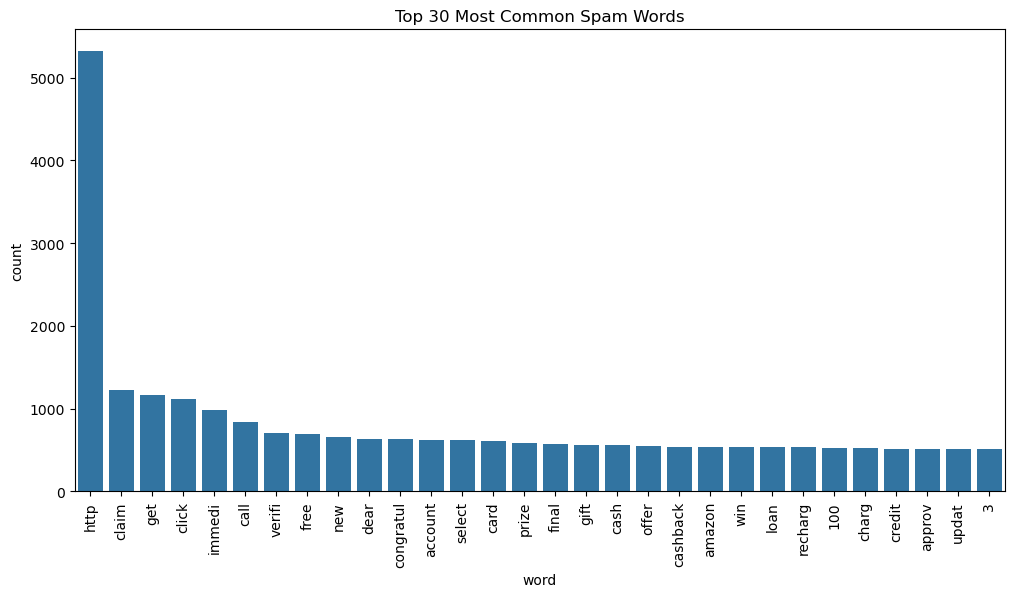

In [278]:
from collections import Counter
# counter create a dictionary in which number of times word come
common_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['word', 'count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=common_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Spam Words")
plt.show()

In [280]:
ham_corpus = []
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [282]:
len(ham_corpus)

44424

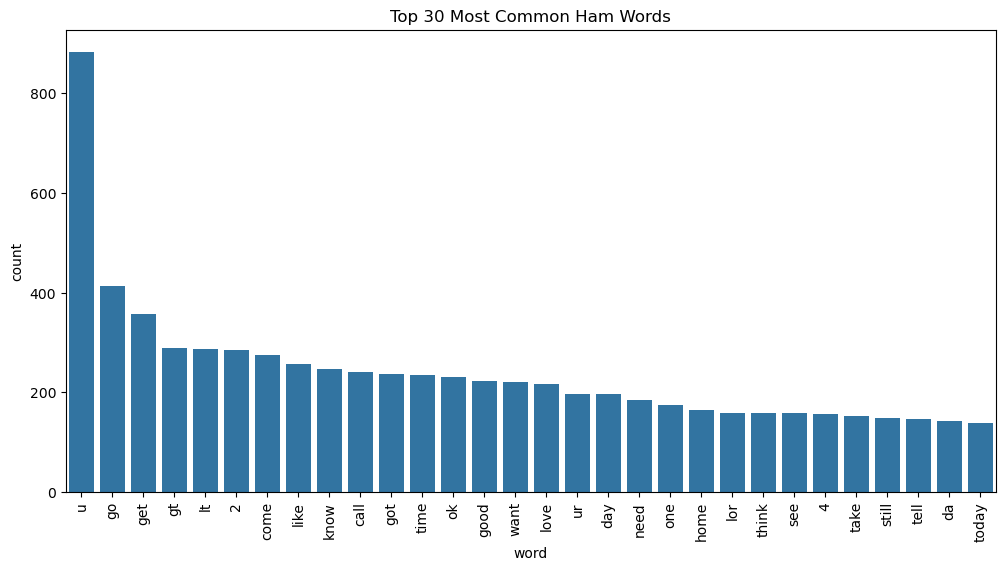

In [284]:
from collections import Counter
common_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['word', 'count'])
plt.figure(figsize=(12, 6))
sns.barplot(x='word', y='count', data=common_df)
plt.xticks(rotation='vertical')
plt.title("Top 30 Most Common Ham Words")
plt.show()

## 4.MODEL BUILDING

In [286]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [570]:
#X = cv.fit_transform(df['transformed_text']).toarray()

In [496]:
X.shape

(10179, 6714)

In [290]:
y = df['target'].values

In [128]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [502]:
from sklearn.model_selection import train_test_split

In [504]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [505]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [508]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [510]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9317288801571709
[[ 782  118]
 [  21 1115]]
0.9042984590429846


In [512]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9734774066797642
[[ 885   15]
 [  39 1097]]
0.9865107913669064


In [514]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9754420432220039
[[ 892    8]
 [  42 1094]]
0.9927404718693285


In [288]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
X.shape

(12079, 7086)

In [292]:
from sklearn.model_selection import train_test_split

In [294]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [296]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [298]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [300]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.9457781456953642
[[1012  105]
 [  26 1273]]
0.9238026124818578


In [302]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9788907284768212
[[1105   12]
 [  39 1260]]
0.9905660377358491


In [304]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9809602649006622
[[1110    7]
 [  39 1260]]
0.994475138121547


In [144]:
# tfidf -->BNB

In [306]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [308]:
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier()
lrc = LogisticRegression(solver='liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators=50 , random_state=2)

In [310]:
clfs = {
    'KN' : knc,
    'NB' : bnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc
}

In [312]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [314]:
train_classifier(knc,X_train,y_train,X_test,y_test)

(0.9511589403973509, 1.0)

In [316]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  KN
Accuracy -  0.9511589403973509
Precision -  1.0
For  NB
Accuracy -  0.9809602649006622
Precision -  0.994475138121547
For  DT
Accuracy -  0.9768211920529801
Precision -  0.9836575875486381
For  LR
Accuracy -  0.9764072847682119
Precision -  0.9944267515923567
For  RF
Accuracy -  0.9846854304635762
Precision -  1.0


In [318]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [320]:
performance_df

,Algorithm,Accuracy,Precision
0,KN,0.951159,1.000000
4,RF,0.984685,1.000000
1,NB,0.980960,0.994475
3,LR,0.976407,0.994427
2,DT,0.976821,0.983658


In [322]:
from sklearn.metrics import classification_report

y_pred = rfc.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1117
           1       1.00      0.97      0.99      1299

    accuracy                           0.98      2416
   macro avg       0.98      0.99      0.98      2416
weighted avg       0.99      0.98      0.98      2416



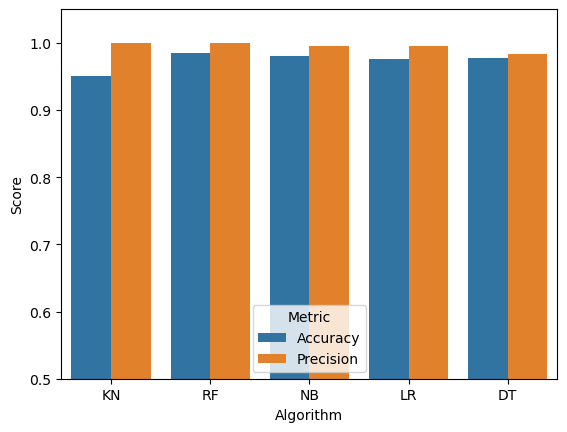

In [324]:
melted_df = pd.melt(performance_df, id_vars='Algorithm', var_name='Metric', value_name='Score')
sns.barplot(x='Algorithm', y='Score', hue='Metric', data=melted_df)
# sns.catplot(x = 'Algorithm', y='value', 
#                hue = 'variable',data=performance_df, kind='bar',height=5)
plt.ylim(0.5,1.05)
# plt.xticks(rotation=0)
plt.show()

In [610]:
# Voting Classifier
rfc  = RandomForestClassifier(n_estimators=50, random_state=2)
bnb  = BernoulliNB()  
lrc  = LogisticRegression(solver='liblinear', penalty='l1')

from sklearn.ensemble import VotingClassifier

In [612]:
voting = VotingClassifier(estimators=[('rfc', rf), ('bnb', bnb), ('lrc', lrc)],voting='soft')

In [614]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('bnb', BernoulliNB()),
                             ('lrc',
                              LogisticRegression(penalty='l1',
                                                 solver='liblinear'))],
                 voting='soft')

In [616]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9774066797642437
Precision 0.9981718464351006


In [326]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))

In [328]:
# Load the saved TF-IDF vectorizer (use 'rb' to read in binary mode)
tfidf = pickle.load(open('vectorizer.pkl', 'rb'))

# Load the saved Random Forest Classifier model (use 'rb' to read in binary mode)
rfc = pickle.load(open('model.pkl', 'rb'))


In [330]:
new_text = ["This is a new document for prediction"]

# Transform the new text using the loaded TF-IDF vectorizer
new_text_transformed = tfidf.transform(new_text)

# Make predictions on the transformed text using the loaded Random Forest model
prediction = rfc.predict(new_text_transformed)

# Print the prediction result
print(f"Prediction: {prediction}")

Prediction: [0]


In [566]:
!pip install streamlit

   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   ---- ----------------------------------- 0.3/2.6 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.6 MB 419.4 kB/s eta 0:00:05
   ------------ --------------------------- 0.8/2.6 MB 578.7 kB/s eta 0:00:04
   ------------ --------------------------- 0.8/2.6 MB 578.7 kB/s eta 0:00:04
   ---------------- ----------------------- 1.0/2.6 MB 572.0 kB/s eta 0:00:03
   ---------------- ----------------------- 1.0/2.6 MB 572.0 kB/s eta 0:00:03
   -------------------- ------------------- 1.3/2.6 MB 599.2 kB/s eta 0:00:03
   ------------------------ --------------- 1.6/2.6 MB 650.5 kB/s eta 0:00:02
   ------------------------ ------------

  You can safely remove it manually.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip
